In [21]:
#Import package

import pandas as pd
import numpy as np

from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
#Import SVM
from sklearn.svm import SVC
from IPython.display import display

import os
os.chdir('C://Users/roulB/data_science/cours/01_SVM/img/')

In [22]:
IMAGES_PATH = "C://Users/roulB/data_science/cours/01_SVM/img/"

os.makedirs(IMAGES_PATH, exist_ok=True)



In [2]:
#Own function
def scaling_features(x):
    return((x-min(x))/(max(x)-min(x)))

In [3]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0],  'o' ,marker='.',markersize = 15)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1],  'o' ,marker='s',markersize = 6)
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

In [4]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    
    '''
    Function qui permet de recupérer la constante et le coefficient directeur
    d'un svm après entraintement.
    
    Un svm lineaire est de la forme w0*w0+w1*x1 +b =0
    donc 
    >= x1= -w0/w1 *x0 -b/w1
    
    avoir x1 en fonction de x0 permet de tracer la zone de décision du SVM 
    et ainsi avoir une réprésentation graphique
    
    Pour calculer les marges on rajoute +- 1/w[1]
    
    
    '''
    
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth=2)
    plt.plot(x0, gutter_up, "k--", linewidth=2)
    plt.plot(x0, gutter_down, "k--", linewidth=2)

In [23]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [30]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

In [5]:
data = load_iris()

In [6]:
iris = pd.DataFrame(np.c_[data['data'],
                          data['target']
                         ],
                    columns = data.feature_names + ['species']
                   )

iris['species'] = iris['species'].astype('int')

Text(0.5, 1.0, 'Scatter plot iris species : Petal length VS petal width')

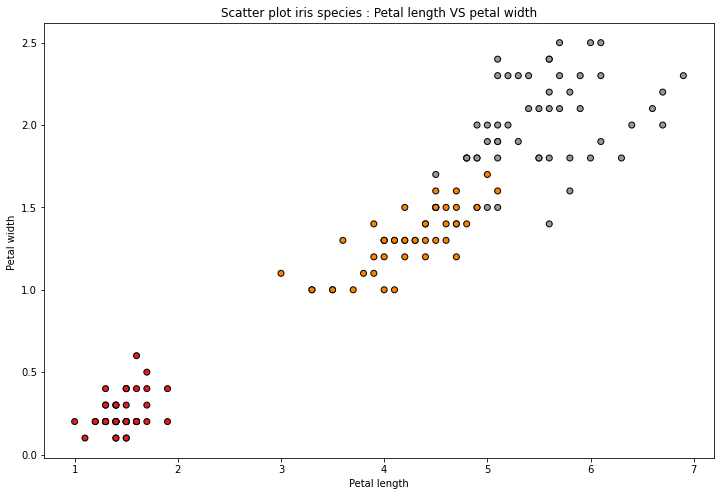

In [8]:
# Vizualize Data
plt.figure(figsize=(12, 8))

plt.scatter(iris['petal length (cm)'] ,iris['petal width (cm)'], c=iris.species, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Petal length")
plt.ylabel("Petal width ")
plt.title('Scatter plot iris species : Petal length VS petal width')
#save_fig("fig_1_iris_scatter_y3")

Text(0.5, 1.0, 'Scatter plot iris species : Petal length VS petal width')

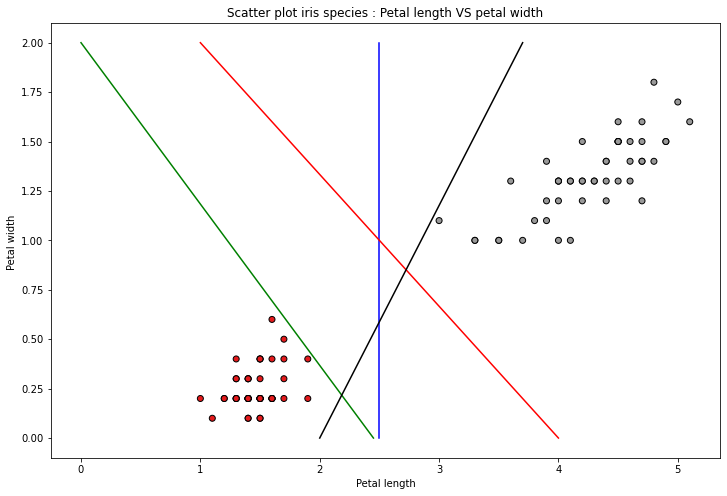

In [9]:
# Binary classification

binari_iris = iris[iris.species!=2]

plt.figure(figsize=(12, 8))

plt.scatter(binari_iris['petal length (cm)'] ,binari_iris['petal width (cm)'], c=binari_iris.species, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Petal length")
plt.ylabel("Petal width ")
plt.plot([0,2.45],[2,0], color = 'g')
plt.plot([2.5,2.5],[2,0], color = 'b')
plt.plot([1,4],[2.0,0], color = 'r')
plt.plot([3.7,2],[2.0,0], color = 'k')
plt.title('Scatter plot iris species : Petal length VS petal width')
#save_fig('fig_2_intuition_svm')



Text(0.5, 1.0, 'Distance entre un point et une droite')

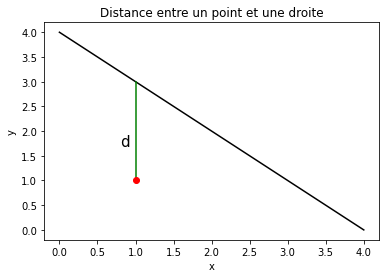

In [10]:
#Rappel maths
plt.plot([0,4],[4,0],  color='k')
plt.plot([1,1],[1,3],  color='g')
plt.plot([1],[1],'o' , color='red')
plt.text(0.8, 1.7, "d", fontsize=15, color="k")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Distance entre un point et une droite')
#save_fig('03_calcul_distance')

Text(0.5, 1.0, 'Scatter plot iris species : Petal length VS petal width')

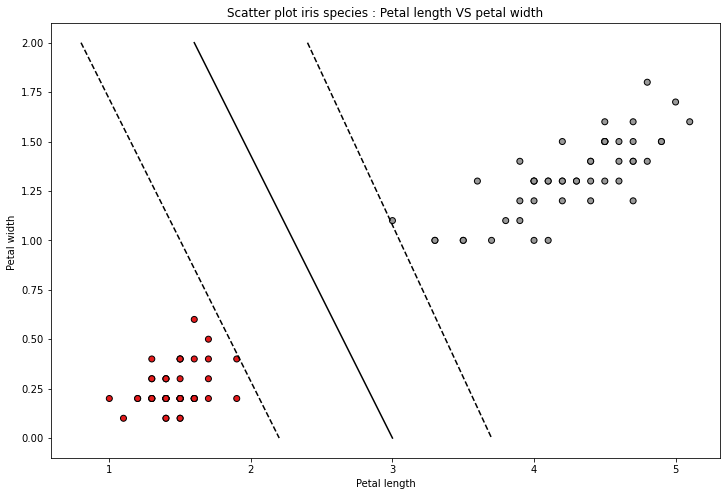

In [11]:
# SVM classification

binari_iris = iris[iris.species!=2]

plt.figure(figsize=(12, 8))

plt.scatter(binari_iris['petal length (cm)'] ,binari_iris['petal width (cm)'], c=binari_iris.species, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Petal length")
plt.ylabel("Petal width ")
plt.plot([0.8,2.2],[2.0,0], color = 'k',linestyle='--')
plt.plot([1.6,3],[2,0], color = 'k')
plt.plot([2.4,3.70],[2.0,0], color = 'k',linestyle='--')
plt.title('Scatter plot iris species : Petal length VS petal width')
#save_fig('fig_4_visualisation_svm_lineaire')


(-2.0, 2.0, -2.0, 2.0)

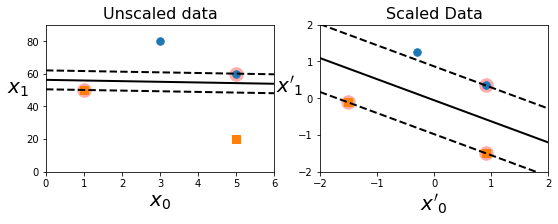

In [12]:
#Bad option
#Raw Data
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
#Fit SVM
svm_clf = SVC(kernel="linear", C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9,2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], 'o' ,marker='.',markersize = 15)
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], 'o' ,marker='s',markersize = 8)
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$  ", fontsize=20, rotation=0)
plt.title("Unscaled data", fontsize=16)
plt.axis([0, 6, 0, 90])

#Scaled Data

X_scaled = (Xs-Xs.mean(axis=0))/Xs.std(axis=0)
svm_clf.fit(X_scaled, ys)

###################################################
# Plus simple avec sklearn :)
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(Xs)
###################################################

plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], 'o' ,marker='.',markersize = 15)
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], 'o' ,marker='s',markersize = 8)
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled Data", fontsize=16)
plt.axis([-2, 2, -2, 2])
#save_fig('fig_5_scaling_data')


In [ ]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])
X = binari_iris[['petal length (cm)','petal width (cm)']]
y= binari_iris['species']


Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel="linear", C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.scatter(Xo1[:, 0],Xo1[:, 1], c=yo1, cmap=plt.cm.Set1, edgecolor="k")
plt.text(0.3, 1.0, "Impossible!", fontsize=15, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.0, 1.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])


plt.sca(axes[1])
plt.scatter(Xo2[:, 0],Xo2[:, 1], c=yo2, cmap=plt.cm.Set1, edgecolor="k")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.plot([3.2],[0.8], 'o' ,marker='.',color='red' ,markersize = 12)
plt.plot([3.0],[1.1], 'o' ,marker='.',color='grey' ,markersize = 12)
plt.plot([3.3],[1.0], 'o' ,marker='.',color='grey' ,markersize = 12)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])
#save_fig('fig_6_svm_linear_problem')

In [14]:
#Import Package
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris virginica

# Code

#Standardiser nos données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Entrainement modèle
# Loss='hinge' permet de dire qu'on utile un SVM classique
# Vous pouvez regarder la doc pour avoir + d'infos
svm_clf= LinearSVC(loss='hinge', C=1)
svm_clf.fit(X_scaled, y)

#Prediction pour un nouveau point
svm_clf.predict([[1,1]])
#==> array([1.])

array([1.])

In [15]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(C=1, loss="hinge", random_state=42)
svm_clf2 = LinearSVC(C=50, loss="hinge", random_state=42)
svm_clf3 = LinearSVC(C=500, loss="hinge", random_state=42)

scaled_svm_clf1 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf1),
    ])
scaled_svm_clf2 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf2),
    ])

scaled_svm_clf3 = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf3),
    ])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)
scaled_svm_clf3.fit(X, y)

C:\Users\roulB\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=500, loss='hinge', random_state=42))])

In [16]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
b3 = svm_clf3.decision_function([-scaler.mean_ / scaler.scale_])
w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_
w3 = svm_clf3.coef_[0] / scaler.scale_
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])
svm_clf3.intercept_ = np.array([b3])
svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])
svm_clf3.coef_ = np.array([w3])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
support_vectors_idx3 = (t * (X.dot(w3) + b3) < 1).ravel()
svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]
svm_clf3.support_vectors_ = X[support_vectors_idx3]

No handles with labels found to put in legend.


Saving figure fig_7_regularisation_critere


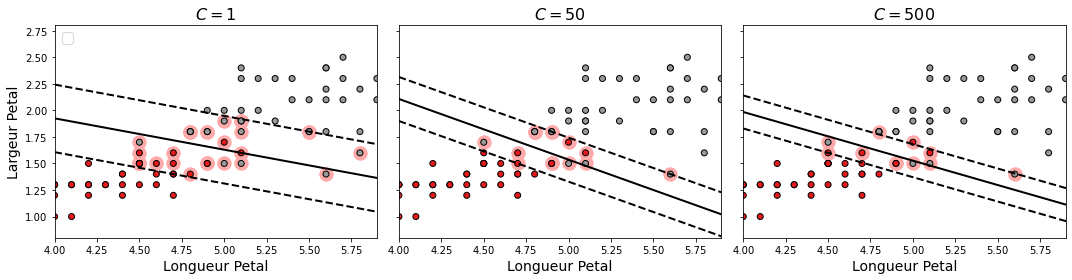

In [24]:
fig, axes = plt.subplots(ncols=3, figsize=(15,4), sharey=True)

plt.sca(axes[0])
plot_svc_decision_boundary(svm_clf1, 4, 5.9)
plt.scatter(X[:, 0],X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Longueur Petal", fontsize=14)
plt.ylabel("Largeur Petal", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf2, 4, 5.99)
plt.scatter(X[:, 0],X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Longueur Petal", fontsize=14)
plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[2])
plot_svc_decision_boundary(svm_clf3, 4, 5.99)
plt.scatter(X[:, 0],X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Longueur Petal", fontsize=14)
plt.title("$C = {}$".format(svm_clf3.C), fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])
save_fig('fig_7_regularisation_critere')


Saving figure fig_8_SVM_non_lineaire


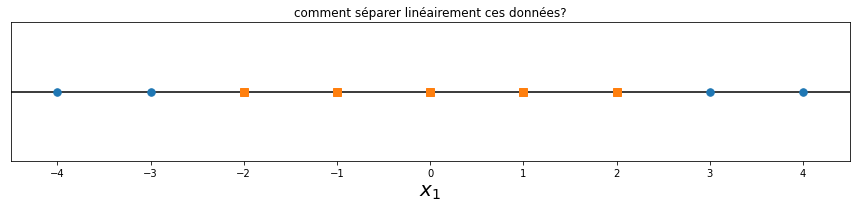

In [25]:
X1 = np.linspace(-4, 4, 9).reshape(-1, 1)
X2 = np.c_[X1, X1**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(12, 3))

plt.subplot(111)
#plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1[:, 0][y==0], np.zeros(4), 'o' ,marker='.',markersize = 15)
plt.plot(X1[:, 0][y==1], np.zeros(5), 'o' ,marker='s',markersize = 8)
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])
plt.title('comment séparer linéairement ces données?')
save_fig('fig_8_SVM_non_lineaire')

Saving figure fig_9_svm_separation_lineaire


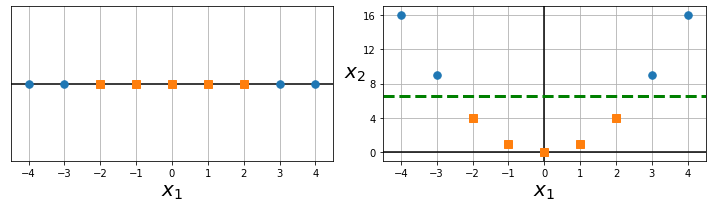

In [26]:
X1 = np.linspace(-4, 4, 9).reshape(-1, 1)
X2 = np.c_[X1, X1**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 3))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.plot(X1[:, 0][y==0], np.zeros(4), 'o' ,marker='.',markersize = 15)
plt.plot(X1[:, 0][y==1], np.zeros(5), 'o' ,marker='s',markersize = 8)
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=20)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(X2[:, 0][y==0], X2[:, 1][y==0],  'o' ,marker='.',markersize = 15)
plt.plot(X2[:, 0][y==1], X2[:, 1][y==1], 'o' ,marker='s',markersize = 8)
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "g--", linewidth=3)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)
save_fig('fig_9_svm_separation_lineaire')

In [28]:
#Import package
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
#Function sklearn qui genere données en forme de lune
X, y = make_moons(n_samples=100, noise=0.15)
polynomial_svm_clf = Pipeline([
("poly_features", PolynomialFeatures(degree=3)),
("scaler", StandardScaler()),
("svm_clf", LinearSVC(C=10, loss="hinge"))
])
polynomial_svm_clf.fit(X, y)

C:\Users\roulB\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf', LinearSVC(C=10, loss='hinge'))])

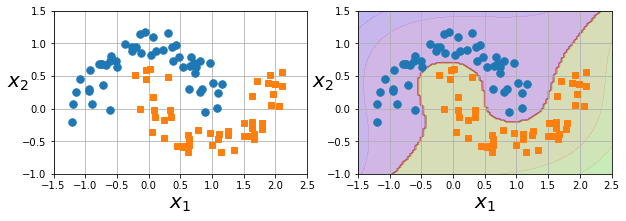

In [31]:
plt.figure(figsize=(10, 3))
plt.subplot(121)
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.subplot(122)
plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
#save_fig('fig_10_classification_non_lineaire')

In [ ]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

poly10_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=1, C=5))
    ])
poly10_kernel_svm_clf.fit(X, y)


poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

In [ ]:
fig, axes = plt.subplots(ncols=3, figsize=(14, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[2])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")


plt.sca(axes[1])
plot_predictions(poly10_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=1, C=5$", fontsize=18)
plt.ylabel("")
#save_fig('fig_11_svm_no_lineaire_hyperpara')

## 12

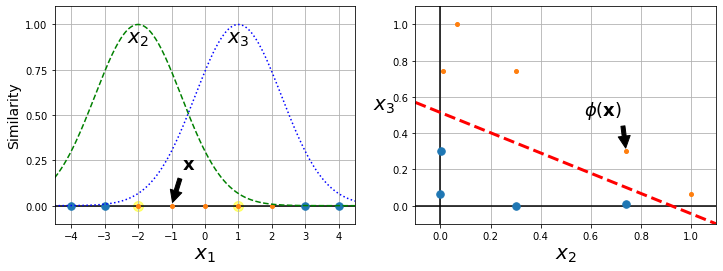

In [34]:
def gaussian_rbf(x, landmark, gamma):
    return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

gamma = 0.3

x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
x2s = gaussian_rbf(x1s, -2, gamma)
x3s = gaussian_rbf(x1s, 1, gamma)

XK = np.c_[gaussian_rbf(X1, -2, gamma), gaussian_rbf(X1, 1, gamma)]
yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10.5, 4))

plt.subplot(121)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.scatter(x=[-2, 1], y=[0, 0], s=100, alpha=0.5, c="yellow")
plt.plot(X1[:, 0][yk==0], np.zeros(4),  'o' ,marker='.',markersize = 15)
plt.plot(X1[:, 0][yk==1], np.zeros(5),  's' ,marker='.',markersize = 8)
plt.plot(x1s, x2s, "g--")
plt.plot(x1s, x3s, "b:")
plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
plt.xlabel(r"$x_1$", fontsize=20)
plt.ylabel(r"Similarity", fontsize=14)
plt.annotate(r'$\mathbf{x}$',
             xy=(X1[3, 0], 0),
             xytext=(-0.5, 0.20),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
plt.axis([-4.5, 4.5, -0.1, 1.1])

plt.subplot(122)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0],  'o' ,marker='.',markersize = 15)
plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], 's' ,marker='.',markersize = 8)
plt.xlabel(r"$x_2$", fontsize=20)
plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
             xy=(XK[3, 0], XK[3, 1]),
             xytext=(0.65, 0.50),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=18,
            )
plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
plt.axis([-0.1, 1.1, -0.1, 1.1])
    
plt.subplots_adjust(right=1)
#save_fig('fig_12_similarity_features')

In [ ]:
## 13

In [35]:

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

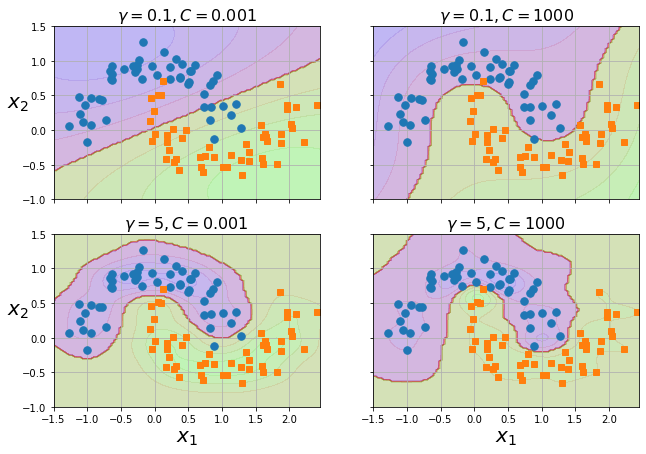

In [36]:
from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")
#save_fig('13_rbf_kernel')

In [ ]:
## 14


In [ ]:
plt.figure(figsize=(12,12))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i].reshape(28,28),cmap='gray_r')
    plt.title('truth: {}'.format(y_train[i]))
    
#save_fig('fig_14_mnist')

## 15

In [38]:
np.random.seed(42)
m = 50
X = 2 * np.random.rand(m, 1)
y = (4 + 3 * X + np.random.randn(m, 1)).ravel()

In [39]:
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon=1.5, random_state=42)
svm_reg.fit(X, y)

LinearSVR(epsilon=1.5, random_state=42)

In [40]:
svm_reg1 = LinearSVR(epsilon=1.5, random_state=42)
svm_reg2 = LinearSVR(epsilon=0.5, random_state=42)
svm_reg3 = LinearSVR(epsilon=3, random_state=42)
svm_reg1.fit(X, y)
svm_reg2.fit(X, y)
svm_reg3.fit(X, y)

def find_support_vectors(svm_reg, X, y):
    y_pred = svm_reg.predict(X)
    off_margin = (np.abs(y - y_pred) >= svm_reg.epsilon)
    return np.argwhere(off_margin)

svm_reg1.support_ = find_support_vectors(svm_reg1, X, y)
svm_reg2.support_ = find_support_vectors(svm_reg2, X, y)
svm_reg3.support_ = find_support_vectors(svm_reg3, X, y)

eps_x1 = 1
eps_y_pred = svm_reg1.predict([[eps_x1]])

Text(0.5, 1.0, '$\\epsilon = 3$')

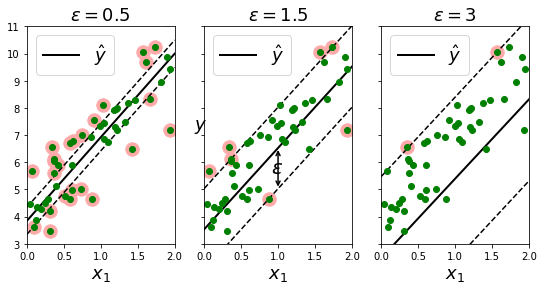

In [41]:
def plot_svm_regression(svm_reg, X, y, axes):
    x1s = np.linspace(axes[0], axes[1], 100).reshape(100, 1)
    y_pred = svm_reg.predict(x1s)
    plt.plot(x1s, y_pred, "k-", linewidth=2, label=r"$\hat{y}$")
    plt.plot(x1s, y_pred + svm_reg.epsilon, "k--")
    plt.plot(x1s, y_pred - svm_reg.epsilon, "k--")
    plt.scatter(X[svm_reg.support_], y[svm_reg.support_], s=180, facecolors='#FFAAAA')
    plt.plot(X, y, "go")
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.legend(loc="upper left", fontsize=18)
    plt.axis(axes)

fig, axes = plt.subplots(ncols=3, figsize=(9, 4), sharey=True)
plt.sca(axes[1])
plot_svm_regression(svm_reg1, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg1.epsilon), fontsize=18)
plt.ylabel(r"$y$", fontsize=18, rotation=0)
#plt.plot([eps_x1, eps_x1], [eps_y_pred, eps_y_pred - svm_reg1.epsilon], "k-", linewidth=2)
plt.annotate(
        '', xy=(eps_x1, eps_y_pred), xycoords='data',
        xytext=(eps_x1, eps_y_pred - svm_reg1.epsilon),
        textcoords='data', arrowprops={'arrowstyle': '<->', 'linewidth': 1.5}
    )
plt.text(0.91, 5.6, r"$\epsilon$", fontsize=20)
plt.sca(axes[0])
plot_svm_regression(svm_reg2, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg2.epsilon), fontsize=18)

plt.sca(axes[2])
plot_svm_regression(svm_reg3, X, y, [0, 2, 3, 11])
plt.title(r"$\epsilon = {}$".format(svm_reg3.epsilon), fontsize=18)
#save_fig('fig_15_svm_reg')